## IMPORTING REQUIRED LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

## LOADING THE DATASET

In [3]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
print("Original Shape: ", df.shape)

#renaming the columns
df.columns=['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 
            'Percent_Expenditure', 'Hep_B', 'Measles', 'BMI', 'Under_5_Deaths', 'Polio', 'Total_Expenditure', 
            'Diptheria', 'AIDS', 'GDP', 'Population', 'Thinness', 'Thinness_5-9yrs', 
            'Income', 'Schooling'] 

#removing unnecessary column 

df = df.drop(columns = ['Adult_Mortality', 'Infant_Deaths','Under_5_Deaths','Percent_Expenditure',
                        'Measles','Thinness_5-9yrs', 'Country','Year', 'Status']) 

### Change income scale from 0-1 TO 1-100
df.Income = df.Income*100 

print("Post Changes Shape: ", df.shape)

df.head()

Original Shape:  (2938, 22)
Post Changes Shape:  (2938, 13)


,Life_Expectancy,Alcohol,Hep_B,BMI,Polio,Total_Expenditure,Diptheria,AIDS,GDP,Population,Thinness,Income,Schooling
0,65.0,0.01,65.0,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,47.9,10.1
1,59.9,0.01,62.0,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,47.6,10.0
2,59.9,0.01,64.0,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,47.0,9.9
3,59.5,0.01,67.0,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,46.3,9.8
4,59.2,0.01,68.0,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,45.4,9.5


## MISSING DATA DETECTION AND REMOVAL

In [7]:
print("Pre Missing Values Qty: ", df.isnull().sum()) 

df = df.dropna(thresh=13) 

print("Post Missing Values Qty: ", df.isnull().sum()) 

print("Post Missing Data Shape: ", df.shape)

Pre Missing Values Qty:  Life_Expectancy       10
Alcohol              194
Hep_B                553
BMI                   34
Polio                 19
Total_Expenditure    226
Diptheria             19
AIDS                   0
GDP                  448
Population           652
Thinness              34
Income               167
Schooling            163
dtype: int64
Post Missing Values Qty:  Life_Expectancy      0
Alcohol              0
Hep_B                0
BMI                  0
Polio                0
Total_Expenditure    0
Diptheria            0
AIDS                 0
GDP                  0
Population           0
Thinness             0
Income               0
Schooling            0
dtype: int64
Post Missing Data Shape:  (1649, 13)


## CONVERT ALL CONTINUOUS NUMERICAL VALUES (FLOAT) TO DISCRETE NUMERICAL VALUES (INTEGER)

In [8]:
df2 = df.select_dtypes(include=['float64']) 
for col in df2.columns.values:
    df2[col] = df2[col].astype('int64') 
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Life_Expectancy    1649 non-null   int64
 1   Alcohol            1649 non-null   int64
 2   Hep_B              1649 non-null   int64
 3   BMI                1649 non-null   int64
 4   Polio              1649 non-null   int64
 5   Total_Expenditure  1649 non-null   int64
 6   Diptheria          1649 non-null   int64
 7   AIDS               1649 non-null   int64
 8   GDP                1649 non-null   int64
 9   Population         1649 non-null   int64
 10  Thinness           1649 non-null   int64
 11  Income             1649 non-null   int64
 12  Schooling          1649 non-null   int64
dtypes: int64(13)
memory usage: 180.4 KB


,Life_Expectancy,Alcohol,Hep_B,BMI,Polio,Total_Expenditure,Diptheria,AIDS,GDP,Population,Thinness,Income,Schooling
0,65,0,65,19,6,8,65,0,584,33736494,17,47,10
1,59,0,62,18,58,8,62,0,612,327582,17,47,10
2,59,0,64,18,62,8,64,0,631,31731688,17,47,9
3,59,0,67,17,67,8,67,0,669,3696958,17,46,9
4,59,0,68,17,68,7,68,0,63,2978599,18,45,9


## Pairplot

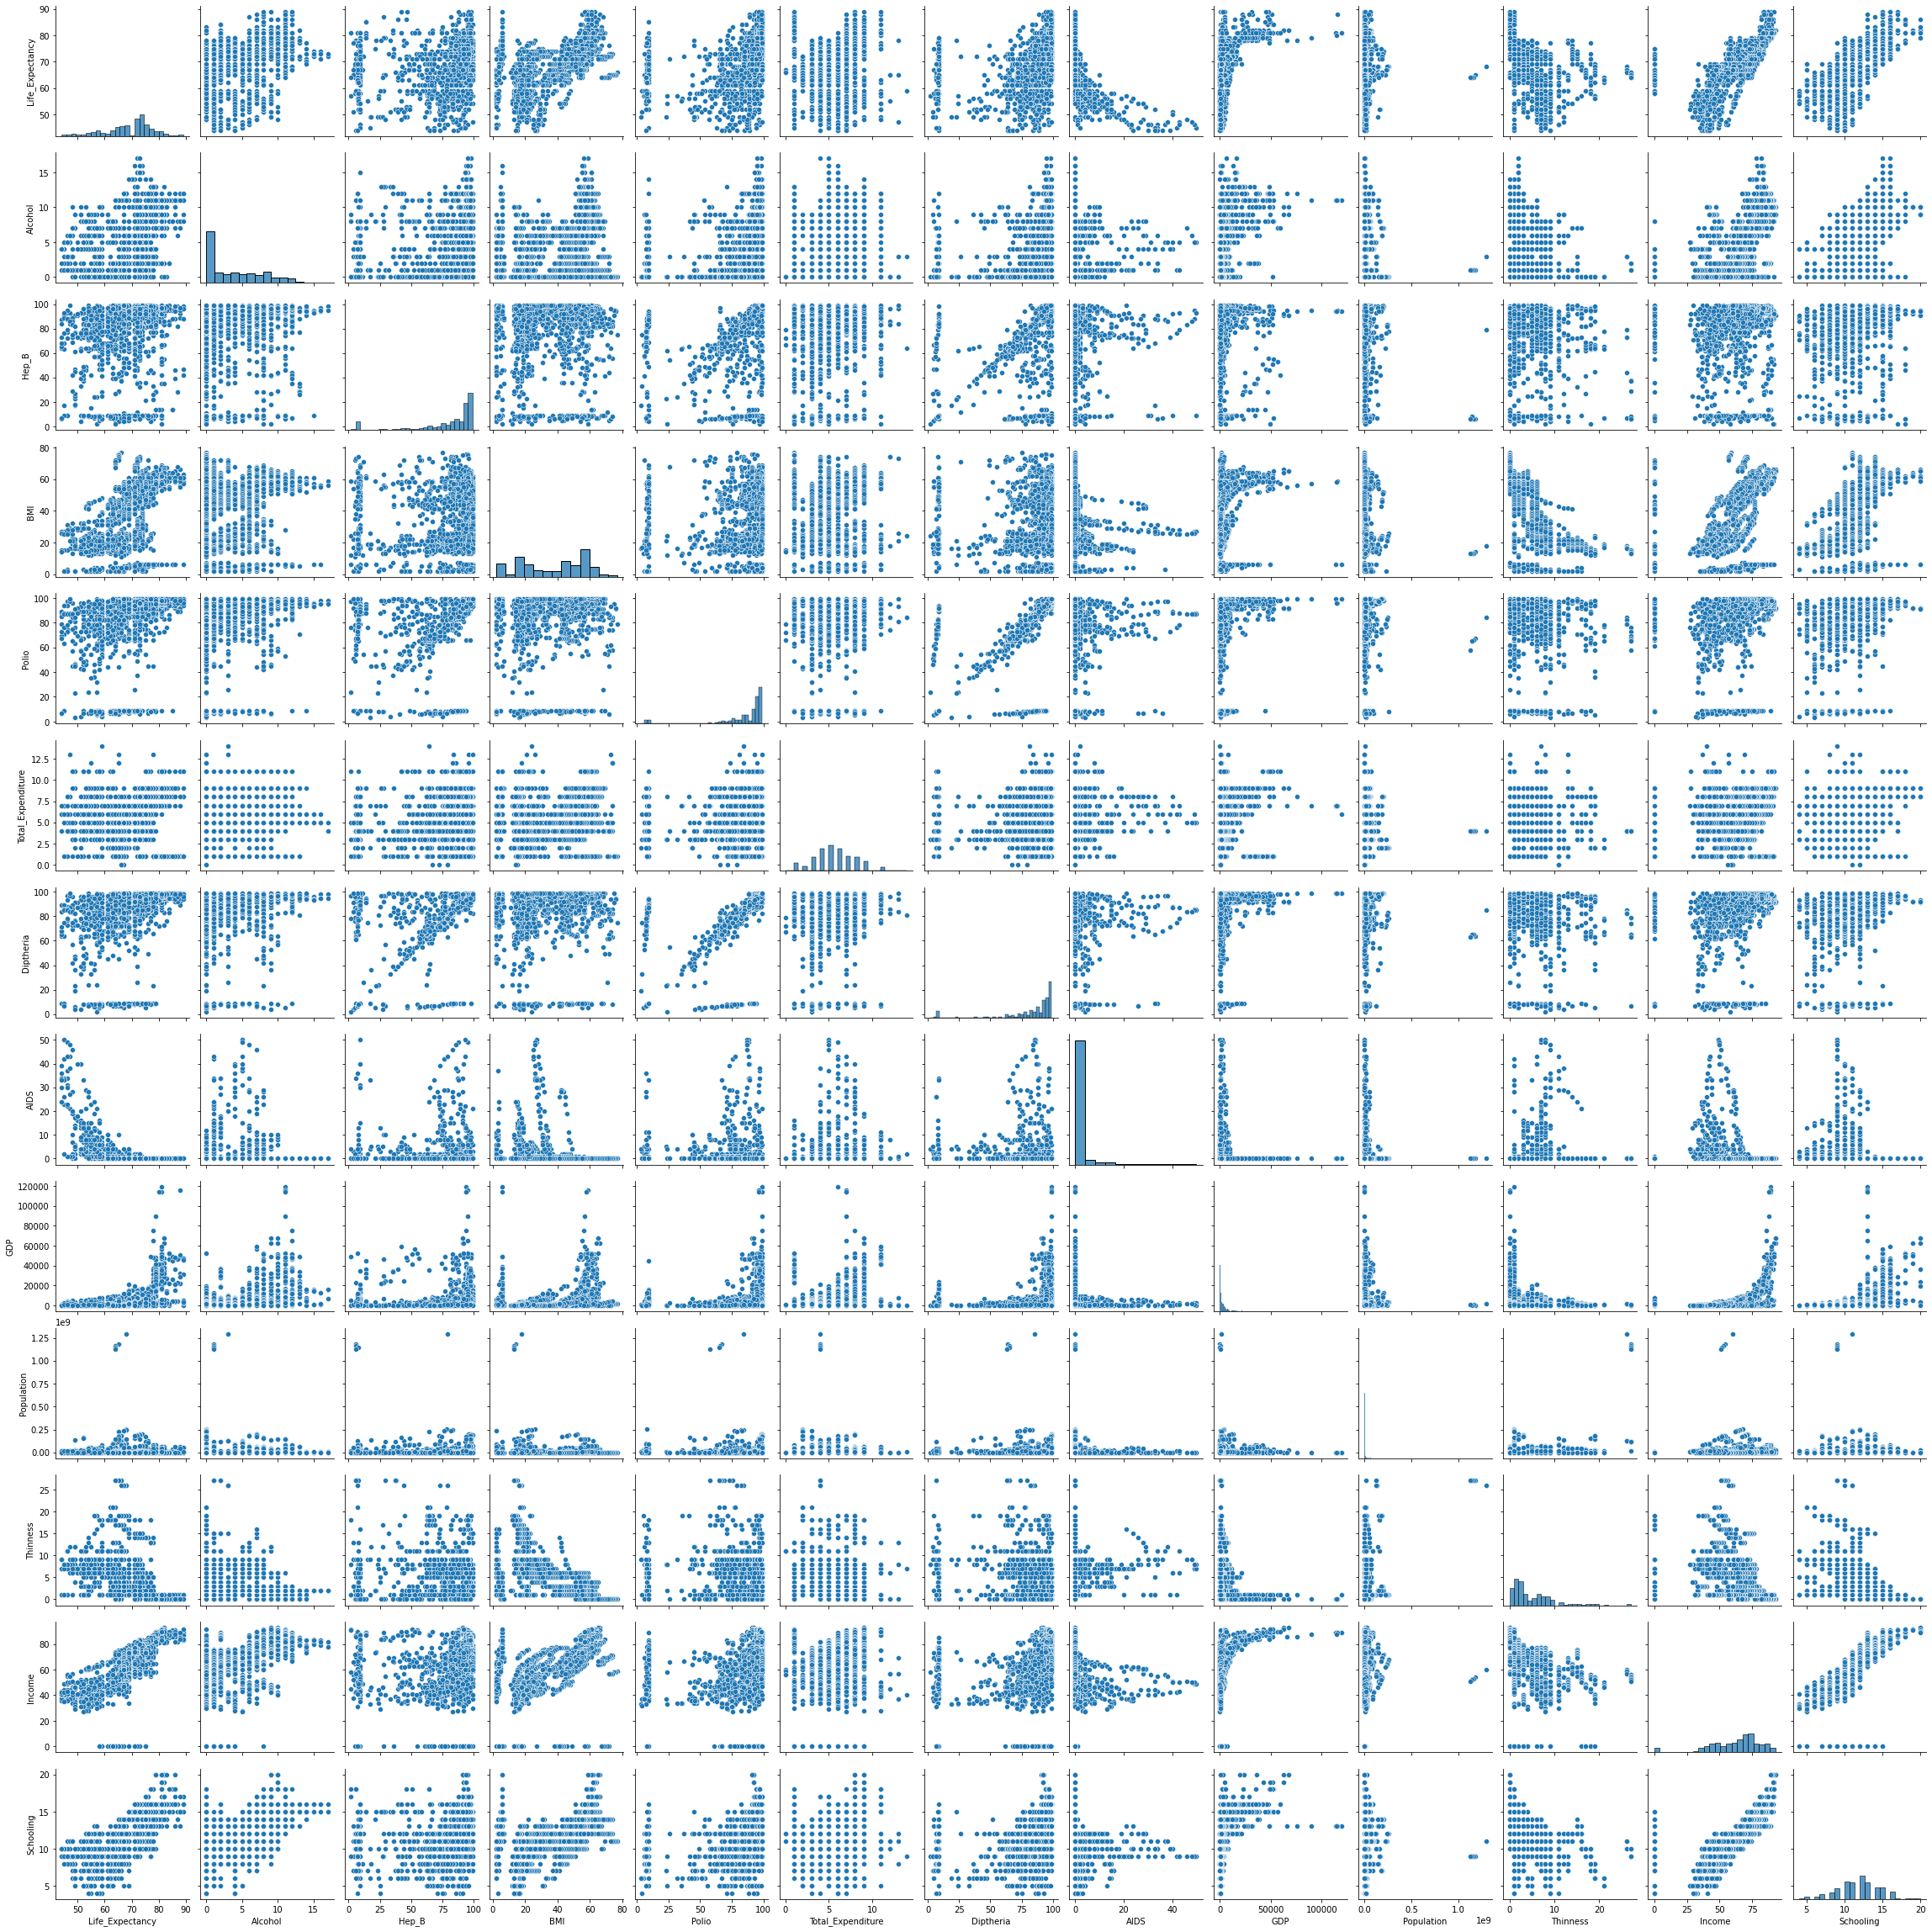

In [9]:
sns.pairplot(df2)

# Outliers

<AxesSubplot:xlabel='Life_Expectancy'>

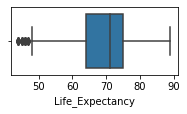

In [10]:
fig, ax = plt.subplots(figsize=(3, 1.25)) # visualization size
sns.boxplot(x=df2['Life_Expectancy'])

In [11]:
df2.describe()

,Life_Expectancy,Alcohol,Hep_B,BMI,Polio,Total_Expenditure,Diptheria,AIDS,GDP,Population,Thinness,Income,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000
mean,68.907216,4.110976,79.217708,37.674348,83.564585,5.429351,84.155246,1.747119,5565.472408,1.465363e+07,4.398423,62.718617,11.658581
std,8.826497,3.968833,25.604664,19.758495,22.450557,2.315002,21.579193,5.962542,11475.899183,7.046039e+07,4.610117,18.269116,2.800267
min,44.000000,0.000000,2.000000,2.000000,3.000000,0.000000,2.000000,0.000000,1.000000,3.400000e+01,0.000000,0.000000,4.000000
25%,64.000000,0.000000,74.000000,19.000000,81.000000,4.000000,82.000000,0.000000,462.000000,1.918970e+05,1.000000,50.000000,10.000000
50%,71.000000,3.000000,89.000000,43.000000,93.000000,5.000000,92.000000,0.000000,1592.000000,1.419631e+06,3.000000,67.000000,12.000000
75%,75.000000,7.000000,96.000000,55.000000,97.000000,7.000000,97.000000,0.000000,4718.000000,7.658972e+06,7.000000,75.000000,14.000000
max,89.000000,17.000000,99.000000,77.000000,99.000000,14.000000,99.000000,50.000000,119172.000000,1.293859e+09,27.000000,93.000000,20.000000


 Pre Outliers Shape:  (1649, 13)
After Outliers Shape:  (1593, 13)


<AxesSubplot:xlabel='Life_Expectancy'>

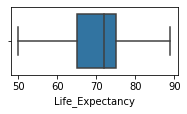

In [12]:
print(" Pre Outliers Shape: ", df2.shape) 


outlier = df2[(df2['Life_Expectancy'] >= 91)|(df2['Life_Expectancy'] <= 49)].index 
df2.drop(outlier, inplace=True) 

print("After Outliers Shape: ", df2.shape) 

fig, ax = plt.subplots(figsize=(3, 1.25)) 
sns.boxplot(x=df2['Life_Expectancy'])

<AxesSubplot:xlabel='GDP'>

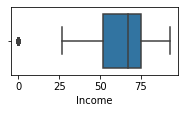

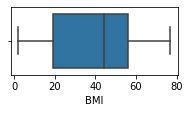

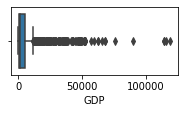

In [13]:
fig, ax = plt.subplots(figsize=(3, 1.25))
sns.boxplot(x=df2['Income'])
fig, ax = plt.subplots(figsize=(3, 1.25))
sns.boxplot(x=df2['BMI'])
fig, ax = plt.subplots(figsize=(3, 1.25))
sns.boxplot(x=df2['GDP'])

# Correlation

In [14]:
df2.corr()

,Life_Expectancy,Alcohol,Hep_B,BMI,Polio,Total_Expenditure,Diptheria,AIDS,GDP,Population,Thinness,Income,Schooling
Life_Expectancy,1.000000,0.441425,0.178584,0.537471,0.336612,0.217799,0.335476,-0.515868,0.462968,-0.035319,-0.459699,0.726400,0.740056
Alcohol,0.441425,1.000000,0.110902,0.351488,0.238892,0.232463,0.248540,-0.010884,0.448040,-0.029031,-0.407838,0.568514,0.622805
Hep_B,0.178584,0.110902,1.000000,0.132642,0.451932,0.108301,0.583144,-0.072431,0.034842,-0.132715,-0.122474,0.171117,0.199899
BMI,0.537471,0.351488,0.132642,1.000000,0.177229,0.198482,0.162772,-0.209302,0.259294,-0.085426,-0.540183,0.496031,0.538388
Polio,0.336612,0.238892,0.451932,0.177229,1.000000,0.115669,0.601299,-0.141593,0.153589,-0.045666,-0.159938,0.307441,0.340057
Total_Expenditure,0.217799,0.232463,0.108301,0.198482,0.115669,1.000000,0.125234,0.047158,0.191686,-0.075121,-0.226921,0.202913,0.252790
Diptheria,0.335476,0.248540,0.583144,0.162772,0.601299,0.125234,1.000000,-0.125943,0.154235,-0.040575,-0.177952,0.333209,0.337410
AIDS,-0.515868,-0.010884,-0.072431,-0.209302,-0.141593,0.047158,-0.125943,1.000000,-0.096059,-0.017250,0.155116,-0.217704,-0.189746
GDP,0.462968,0.448040,0.034842,0.259294,0.153589,0.191686,0.154235,-0.096059,1.000000,-0.021803,-0.277141,0.443593,0.459603
Population,-0.035319,-0.029031,-0.132715,-0.085426,-0.045666,-0.075121,-0.040575,-0.017250,-0.021803,1.000000,0.289180,-0.013284,-0.045156


## HEATMAP

<AxesSubplot:>

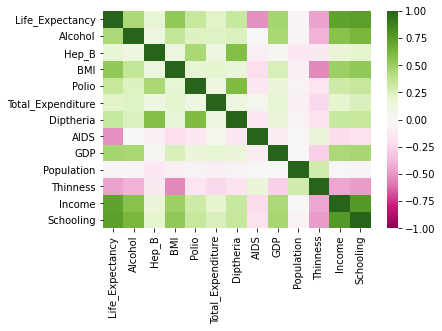

In [15]:
sns.heatmap(df2.corr(),vmin=-1.0,vmax=1.0,cmap="PiYG")

## PERFORMING SUPERVISED AND UNSUPERVISED MACHINE LEARNING

In [16]:
import sklearn
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split

## SPLITTING THE DATASETS

In [17]:
y = df2.Life_Expectancy 
print(y)
x = df2.drop("Life_Expectancy", axis=1) 
print(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

0       65
1       59
2       59
3       59
4       59
        ..
2924    58
2925    56
2926    54
2927    52
2928    50
Name: Life_Expectancy, Length: 1593, dtype: int64
      Alcohol  Hep_B  BMI  Polio  Total_Expenditure  Diptheria  AIDS  GDP  \
0           0     65   19      6                  8         65     0  584   
1           0     62   18     58                  8         62     0  612   
2           0     64   18     62                  8         64     0  631   
3           0     67   17     67                  8         67     0  669   
4           0     68   17     68                  7         68     0   63   
...       ...    ...  ...    ...                ...        ...   ...  ...   
2924        6     95    3     95                  6         95     6  111   
2925        6     97    3     95                  6         95     8  955   
2926        6     94   29     93                  6         93    13  839   
2927        5      9   29     89                  5        

In [18]:
print(x_train.info())
print(x_test.info())
print(y_train.describe())
print(y_test.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 418 to 1573
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Alcohol            1274 non-null   int64
 1   Hep_B              1274 non-null   int64
 2   BMI                1274 non-null   int64
 3   Polio              1274 non-null   int64
 4   Total_Expenditure  1274 non-null   int64
 5   Diptheria          1274 non-null   int64
 6   AIDS               1274 non-null   int64
 7   GDP                1274 non-null   int64
 8   Population         1274 non-null   int64
 9   Thinness           1274 non-null   int64
 10  Income             1274 non-null   int64
 11  Schooling          1274 non-null   int64
dtypes: int64(12)
memory usage: 129.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 1027 to 2292
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----


In [19]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [20]:
from sklearn.linear_model import LinearRegression 

LR = LinearRegression().fit(x_train, y_train) 

print("intercept: ", LR.intercept_)
print("coefficient: ", LR.coef_)

intercept:  69.68681318681318
coefficient:  [-0.58691938 -0.15161723  0.66571859  0.31082661  0.28547489  0.25315812
 -2.74661418  1.0251354   0.0407554  -0.41007854  2.03702251  2.75607913]


In [21]:
from sklearn.model_selection import cross_val_score 

LRscore = cross_val_score(LR,x_train,y_train,cv=5) 

print('LR Scores: ', LRscore)
print('LR Score Mean: ', LRscore.mean())

LR Scores:  [0.77907322 0.72671965 0.72486877 0.73105517 0.74061633]
LR Score Mean:  0.7404666296658929


## SHOW TABLE OF VARIABLE IMPORTANCE

In [22]:
from sklearn.linear_model import LinearRegression 

LR = LinearRegression()
LR.fit(x, y)
pd.DataFrame({'Variable':x.columns,
              'Importance':LR.rank_}).sort_values('Importance', ascending=True)

,Variable,Importance
0,Alcohol,12
1,Hep_B,12
2,BMI,12
3,Polio,12
4,Total_Expenditure,12
5,Diptheria,12
6,AIDS,12
7,GDP,12
8,Population,12
9,Thinness,12


# Thank You